In [1]:
import pyart
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks 
import datetime as dt
from datetime import date
from datetime import time
from datetime import timedelta
import pandas as pd

import warnings
import glob
import gc
import copy
import os
import scipy as scipy

import sys

#base_path = '/nfs/foe-data-32/export/ncas/earljbe/mount/'
base_path = '/gws/nopw/j04/'
sys.path.append(os.path.join(base_path,'ncas_radar_vol1/lindsay/bin'))

import calib_functions

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%matplotlib inline

In [6]:
#awsdir = '/nfs/foe-data-32/export/ncas/data/ncasdata/inc_data/rain-e/met/Archive/'

#outdir = '/gws/nopw/j04/ncas_radar_vol2/data/xband/raine/calibrations/ZDRcalib/'
outdir = os.path.join(base_path, 'ncas_radar_vol2/data/xband/raine/calibrations/ZDRcalib/')
proc_dates = [os.path.basename(x) for x in glob.glob(outdir+'20*')]

all_hourly_data=pd.DataFrame()
all_data = pd.DataFrame()
#aws_all_data = pd.DataFrame()

for date in proc_dates[0:]:
    file2 = os.path.join(outdir,date,'hourly_ml_zdr.csv')
    file1 = os.path.join(outdir,date,'day_ml_zdr.csv')
    if os.path.exists(file2):
        data2 = pd.read_csv(file2,index_col=0, parse_dates=True)
    #Concatenate days together
        all_hourly_data = pd.concat([all_hourly_data, data2])
        
    if os.path.exists(file1):    
        data1 = pd.read_csv(file1,index_col=0, parse_dates=True)
        all_data = pd.concat([all_data, data1])
        
#     aws_file = os.path.join(awsdir,'CUSTOM-ARC-'+date[0:4]+'-'+date[4:6]+'-'+date[6:8]+'-METRIC.csv')
#     if os.path.exists(aws_file):
#         aws_data = pd.read_csv(aws_file,index_col=0,parse_dates=True)
#         if aws_data.empty==False:
#             aws_data = aws_data.resample('H').mean()
#             aws_all_data = pd.concat([aws_all_data, aws_data])
        
zdr_day_avg2 = all_hourly_data.resample('D').mean()
zdr_std2 = all_hourly_data.resample('D').std()

zdr_day_avg1 = all_data.resample('D').mean()
zdr_std1 = all_data.resample('D').std()

#aws_all_data.columns=['TA','TW','HIndex','RH','TD','WS','HiWS','WD','R','RRate','P','InTA','InRH']

In [7]:
monthly_mean = all_data.resample('M').mean()
weekly_mean = all_data.resample('W').mean()
biweekly_mean = all_data.resample('SM').mean()

In [ ]:
# outdir2 = os.path.join(base_path, 'ncas_radar_vol2/calibrations/ZDRcalib/ukv_heights/')
# files = [os.path.basename(x) for x in glob.glob(outdir2 + "*.txt")]

# ukv_hourly_data=pd.DataFrame()

# for ff in files[0:]:
#     day = ff[9:17]
#     #print day
#     hourly_T = pd.to_datetime(day) + pd.timedelta_range('00:00:00','23:00:00',freq='1H')
#     ukv_hgt = np.loadtxt(outdir2+ff)    
#     output = pd.DataFrame({'UKV Hgt' : ukv_hgt[0:24]}, index=hourly_T)
#     ukv_hourly_data = pd.concat([ukv_hourly_data, output])

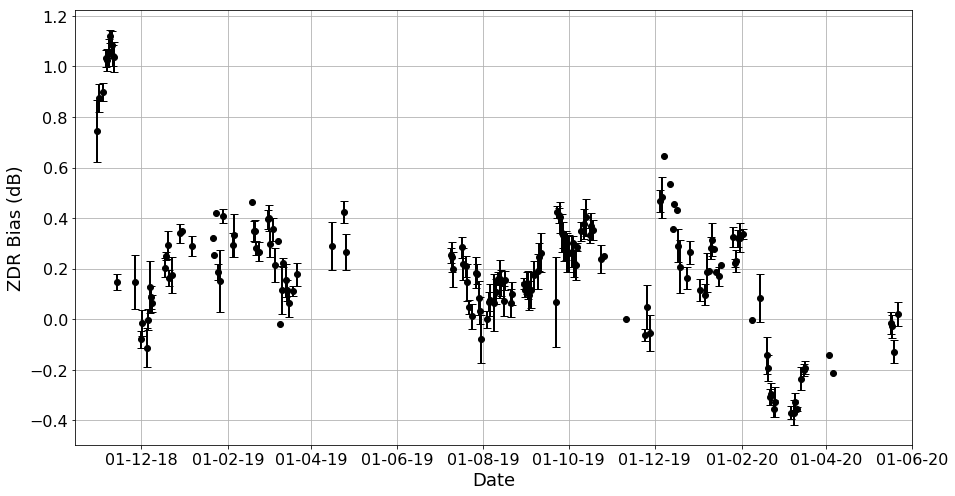

In [9]:
#(3) Make a plot showing all ZDR data across the year
fig,ax1 = plt.subplots(figsize=(15,8))#figure()

#plt.plot_date(all_data.index,all_data['ZDR'],'kx')
#plt.plot_date(zdr_day_avg1.index,zdr_day_avg1['ZDR'],'ro')
plt.errorbar(zdr_day_avg1.index,zdr_day_avg1['ZDR'],yerr=zdr_std1['ZDR'],color='black',fmt='o',
             markersize='6', elinewidth=2, capsize=4)
#plt.errorbar(zdr_day_avg2.index,zdr_day_avg2['H_ZDR'],yerr=zdr_std2['H_ZDR'],color='black',fmt='o',
#             markersize='6', elinewidth=2,capsize=4)
#plt.plot_date(biweekly_mean.index, biweekly_mean['ZDR'],'rx-')

plt.yticks(size=16)
plt.xticks(size=16)
plt.grid()

plt.ylabel('ZDR Bias (dB)', fontsize=18)
plt.xlabel('Date', fontsize=18)


plt.xlim([dt.datetime(2018, 10, 15),dt.datetime(2020, 6, 1)])
#plt.xlim([dt.datetime(2020, 2, 1),dt.datetime(2020, 5, 15)])

monthyearFmt = mdates.DateFormatter('%d-%m-%y')
ax1.xaxis.set_major_formatter(monthyearFmt)


# ax2=ax1.twinx()
# #ax2.set_ylim(0,20000)
# for date in proc_dates[0:]:
#     ax2.plot(aws_all_data[date].index, aws_all_data[date]['TA'],'b-')
# #ax2.set_yticks([5000, 10000])
# #ax2.set_yticks([1000, 2000, 3000, 4000, 7500],minor=True)
# plt.ylabel('Temperature',{'fontsize':18})
# plt.yticks(size=18)
#plt.xlim(pd.to_datetime('20200501'),pd.to_datetime('20200530'))


#img_name = os.path.join(outdir,'images/full_raine_zdr_error_250520.png')
#plt.savefig(img_name,dpi=150)

#Save plot
#plt.savefig(os.path.join(outdir,'images','full_raine_zdr.png'))
#plt.close()



In [9]:
print np.nanmedian(all_hourly_data.loc['2018-10-30':'2018-11-13']['H_ZDR']) 
print np.nanmedian(all_hourly_data.loc['2018-11-14':'2020-02-01']['H_ZDR'])
print np.nanmedian(all_hourly_data.loc['2020-02-16':'2020-04-01']['H_ZDR'])
print np.nanmedian(all_hourly_data.loc['2020-05-01':'2020-06-10']['H_ZDR'])
#all_data.resample(index).mean()

1.0290899276733398
0.1960303895175457
-0.2298775613307953
-0.011811023578047752


In [ ]:
print np.nanmedian(all_data.loc['2018-10-30':'2018-11-13']['ZDR']), 
np.nanmedian(all_data.loc['2018-11-14':'2020-02-01']['ZDR']),
np.nanmedian(all_data.loc['2020-02-16':'2020-04-01']['ZDR'])

In [6]:
all_hourly_data.index

DatetimeIndex(['2018-10-31 20:30:00', '2018-10-31 21:30:00',
               '2018-10-31 22:30:00', '2018-10-31 23:30:00',
               '2018-11-01 00:30:00', '2018-11-01 01:30:00',
               '2018-11-04 20:30:00', '2018-11-06 18:30:00',
               '2018-11-06 19:30:00', '2018-11-06 23:30:00',
               ...
               '2020-05-18 15:30:00', '2020-05-18 20:30:00',
               '2020-05-18 21:30:00', '2020-05-18 22:30:00',
               '2020-05-19 01:30:00', '2020-05-19 02:30:00',
               '2020-05-22 00:30:00', '2020-05-22 01:30:00',
               '2020-05-22 02:30:00', '2020-05-22 03:30:00'],
              dtype='datetime64[ns]', length=513, freq=None)

In [ ]:
#(4) Make plot of all melting layers across whole period
# fig = plt.figure(figsize=(15,8))

# ax1 = fig.add_axes([0, 0, 1, 1])
# ax2 = fig.add_axes()
# # This is the magic that joins the x-axis
# ax2 = ax1.twinx()

# ax1.plot(zdr_day_avg.index,zdr_day_avg['H_ML'],'bx')
# ax2.plot(aws.index,aws['Temp C'],'rx-')


#plt.plot_date(all_hourly_data.index,all_hourly_data['H_ML'],'kx')
#plt.plot_date(zdr_day_avg.index,zdr_day_avg['H_ML'],'bx')

#plt.yticks(size=16)
#plt.xticks(size=16)
#plt.grid()

#plt.ylabel('Melting Layer (km)', fontsize=18)
#plt.xlabel('Date', fontsize=18)

#Save plot
#plt.savefig(os.path.join(outdir,'images','full_raine_ml.png'))
#plt.close()